# HOUSE RENT PREDICTION OF DIFFERENT CITIES OF INDIA

### In this notebook, we will be creating a model that will predict the rent of a house/apartment/flat based on various input features present in the dataset. We will also do some exploratory data analysis, data preprocessing, and feature engineering if required.

#Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Loading House Rent Dataset and rename as df

In [2]:
df = pd.read_csv("C:\\Users\\VIVEK KUMAR SINGH\\OneDrive - nitrkl.ac.in\\data analytics\\capstone project 1\\House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


#### Dataset do not contain any null values.
#### Dataset contains both categorical and numerical columns.



In [4]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


#### There seems to be presence of outliers in Rent and Size column.

In [5]:
# Segregating of numerical and non numerical features of dataset
numerical_features = df.columns[df.dtypes != 'object'].tolist()
numerical_features.remove('Rent')
non_numerical_features = df.columns[df.dtypes == 'object'].tolist()

print(numerical_features)
print(non_numerical_features)

['BHK', 'Size', 'Bathroom']
['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']


## EDA and Feature Engineering

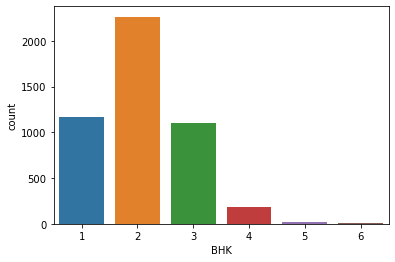

In [6]:
sns.countplot(x='BHK',data=df)
plt.show()

#### BHK = 2 is most commonly prefferent by the customer in India, followed by 1,3 and 4. The least preffered is 5 and 6.

### Lets check the variation of Size with BHK

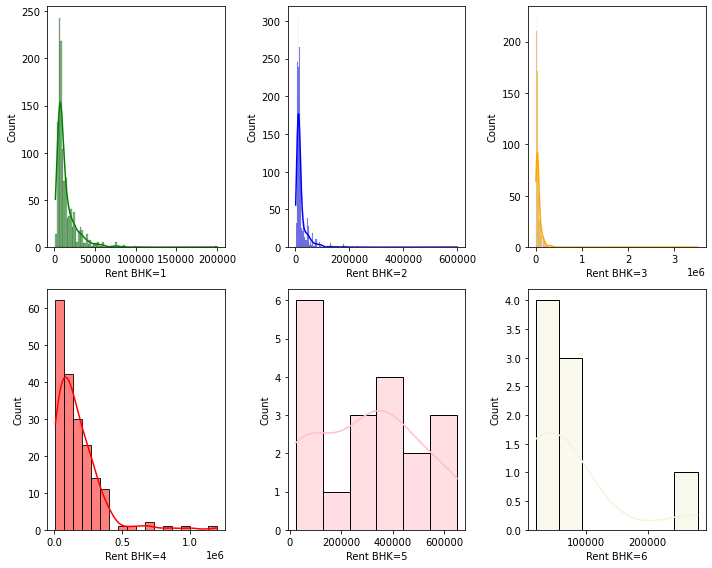

In [7]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(10,8))
sns.histplot(data=df[df['BHK']==1],x='Rent',ax=axs[0,0],kde=True,color='green')
axs[0,0].set(xlabel='Rent BHK=1')

sns.histplot(data=df[df['BHK']==2],x='Rent',ax=axs[0,1],kde=True,color='blue')
axs[0,1].set(xlabel='Rent BHK=2')

sns.histplot(data=df[df['BHK']==3],x='Rent',ax=axs[0,2],kde=True,color='orange')
axs[0,2].set(xlabel='Rent BHK=3')

sns.histplot(data=df[df['BHK']==4],x='Rent',ax=axs[1,0],kde=True,color='red')
axs[1,0].set(xlabel='Rent BHK=4')

sns.histplot(data=df[df['BHK']==5],x='Rent',ax=axs[1,1],kde=True,color='pink')
axs[1,1].set(xlabel='Rent BHK=5')

sns.histplot(data=df[df['BHK']==6],x='Rent',ax=axs[1,2],kde=True,color='beige')
axs[1,2].set(xlabel='Rent BHK=6')

plt.tight_layout()
plt.show()



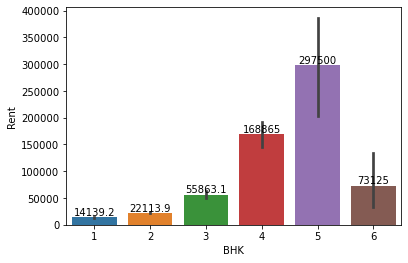

In [8]:
fig, ax = plt.subplots()
sns.barplot(data=df, x='BHK', y='Rent', ci=95, estimator=np.mean, ax=ax)
ax.bar_label(ax.containers[0])
plt.show()

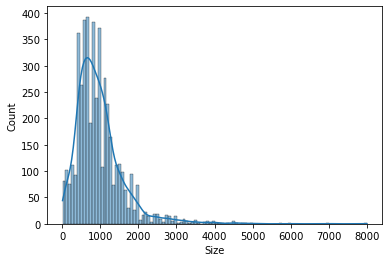

<Figure size 2000x900 with 0 Axes>

In [12]:
sns.histplot(x='Size',data=df,kde=True)
plt.figure(figsize=(20,9),dpi=100)
plt.show()

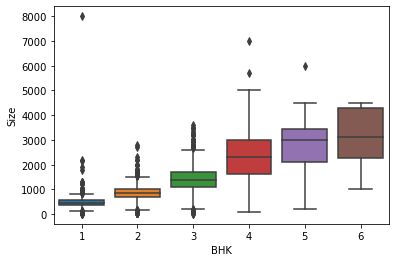

In [13]:
sns.boxplot(x='BHK',y='Size',data=df)
plt.show()

#### As expected the size increases with BHK.
#### It can be clearly observed that the outliners lies with each value of BHK except BHK=6. Let's deal with the low- valued outliers. I will replace their values with a value equal to (0.25quantile - 1.5*iqr).

In [14]:
for BHK in [1, 2, 3]:
    size_values = df[df['BHK'] == BHK]['Size']
    q3 = size_values.quantile(0.75)
    q1 = size_values.quantile(0.25)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    size_values = size_values.apply(lambda x: x if x >= lower_limit else lower_limit)
    df.loc[df['BHK'] == BHK, 'Size'] = size_values


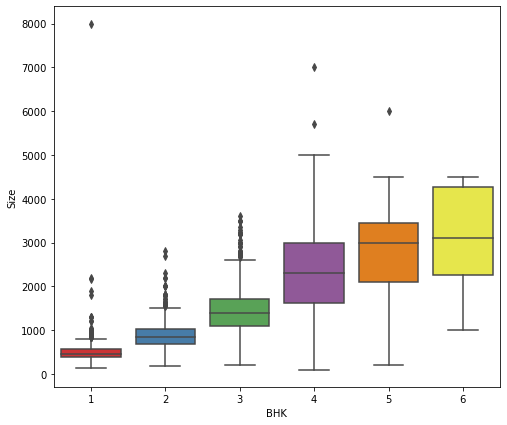

In [15]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.boxplot(data=df, x='BHK', y='Size', palette='Set1', ax=ax)
plt.show()

In [16]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


#### Let's look at Floor

It has four kinds of values: "num out of num", "Ground out of num", "Upper Basement out of num", "Lower Basement out of num". I will replace Ground with 0, Upper Basement with -1, and Lower Basement with -2

In [20]:
df_1 = df.copy()

In [21]:
def modify_floor(x):
    x = x.replace('Ground', '0')
    x = x.replace('Upper Basement', '-1')
    x = x.replace('Lower Basement', '-2')
    return x

In [22]:
df_temp = df.copy()
df_temp['Floor'] = df_temp['Floor'].apply(lambda x: modify_floor(x))
df_temp = df_temp['Floor'].str.split(' out of ', expand=True).rename(columns={0:'Floor', 1:'Total Floors'})
df_1['Floor'] = df_temp['Floor']
df_1['Total Floors'] = df_temp['Total Floors']

In [23]:
df_1.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


In [27]:
df_1.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Total Floors         4
dtype: int64

In [ ]:
# There are 4 instances where the total number of floors are not given. I will remove these rows from the dataset.

In [28]:
print(df_1.shape[0])
df_1 = df_1.dropna()
print(df_1.shape[0])

4746
4742


In [29]:
df_1['Floor'] = df_1['Floor'].astype(int)
df_1['Total Floors'] = df_1['Total Floors'].astype(int)

C:\Users\VIVEK KUMAR SINGH\AppData\Local\Temp\ipykernel_10300\140901786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Floor'] = df_1['Floor'].astype(int)
C:\Users\VIVEK KUMAR SINGH\AppData\Local\Temp\ipykernel_10300\140901786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Total Floors'] = df_1['Total Floors'].astype(int)


In [ ]:
# Two new features Floor and Total Floors are created.

In [30]:
df = df_1

### Let's observe the column Area Type

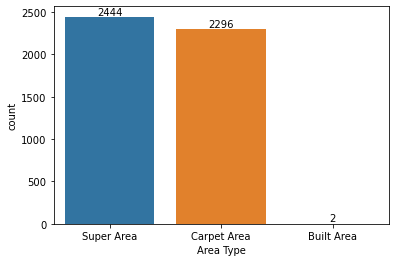

In [31]:
fig, ax=plt.subplots()
sns.countplot(x='Area Type',data=df,ax=ax)
ax.bar_label(ax.containers[0])
plt.show()

#### Super Area and Carpet Area is mostly prefferedequally by the renters and Built Area is approximately not preffered.

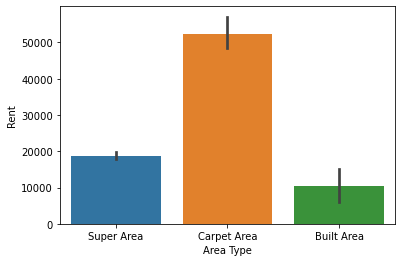

In [32]:
sns.barplot(x='Area Type',y='Rent',data=df)
plt.show()

In [36]:
# The houses with Carpet Area seems to be more expensive than other area type.

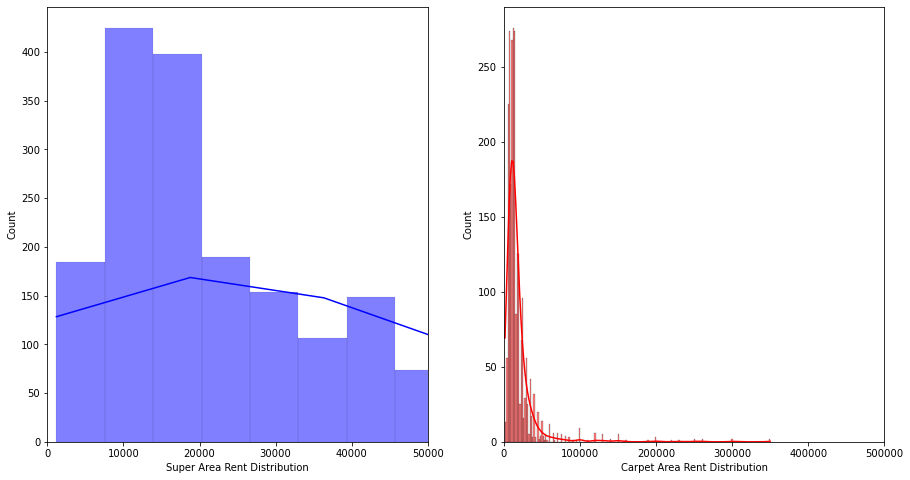

In [33]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.histplot(data=df[df['Area Type']=='Carpet Area'],x='Rent',ax=axs[0],kde=True,color='b')
axs[0].set(xlim=(0, 50000), xlabel="Super Area Rent Distribution")
sns.histplot(data=df[df['Area Type']=='Super Area'],x='Rent',ax=axs[1],kde=True,color='r')
axs[1].set(xlim=(0, 500000), xlabel="Carpet Area Rent Distribution")

plt.show()

<Figure size 720x432 with 0 Axes>

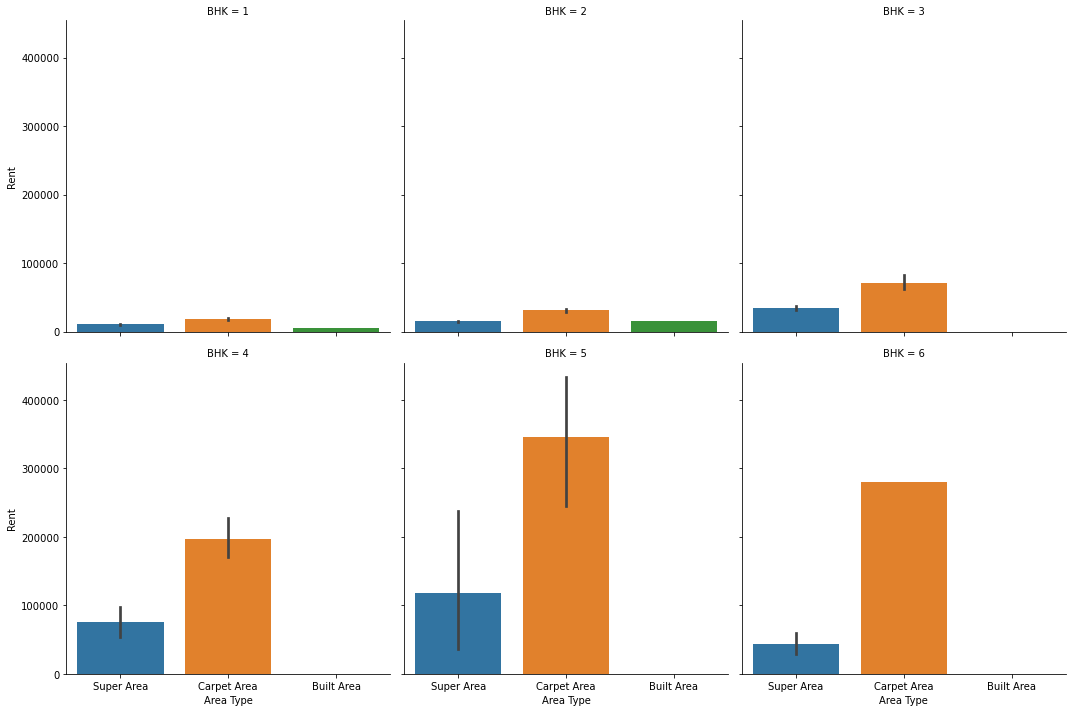

In [34]:
plt.figure(figsize=(10,6))
sns.catplot(data=df, x='Area Type', y='Rent', kind='bar', col='BHK', col_wrap=3)
plt.tight_layout()
plt.show()

In [35]:
# This shows that carpet area is expensive in each number of BHK.

#### Let's look at Area Locality column of dataset

In [41]:
df['Area Locality'].value_counts()

Bandra West                                           37
Gachibowli                                            29
Electronic City                                       24
Velachery                                             22
Miyapur, NH 9                                         22
                                                      ..
Serenity Complex                                       1
Charkop Sector 6                                       1
Hiranandani Gardens Odyssey I, Hiranandani Gardens     1
in Mahim West                                          1
Manikonda, Hyderabad                                   1
Name: Area Locality, Length: 2233, dtype: int64

In [42]:
# Since the number of unique value is 2233, which is very high. So we can drop this column.

In [43]:
df.drop('Area Locality',axis=1,inplace=True)

C:\Users\VIVEK KUMAR SINGH\AppData\Local\Temp\ipykernel_10300\1552589679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Area Locality',axis=1,inplace=True)


In [44]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


### Let's analyse the city column

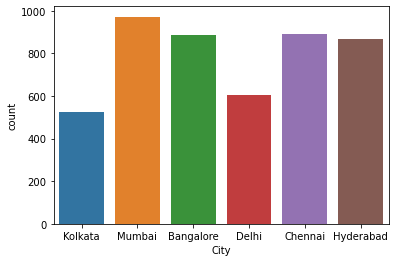

<Figure size 1500x500 with 0 Axes>

In [52]:
sns.countplot(x='City',data=df)
plt.figure(figsize=(15,5),dpi=100)
plt.show()

In [ ]:
# Mumbai seems to be more favoured city to take houses on rent. Kolkata seems to be least favoured.

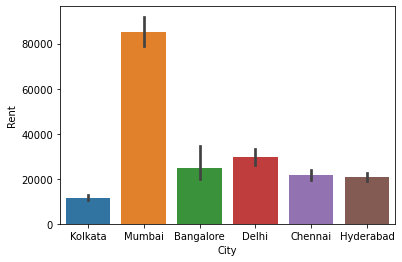

In [54]:
sns.barplot(x='City',y='Rent',data=df)
plt.show()

In [55]:
# The houses of Mumbai and Kolkata is very expensive and least expensive than any other city in India respectively. 

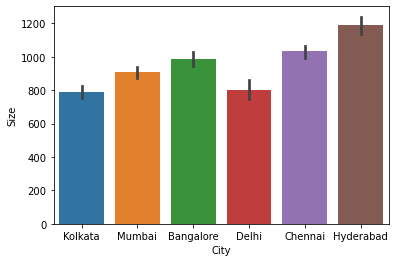

In [56]:
sns.barplot(x='City',y='Size',data=df)
plt.show()

In [57]:
# The size of houses of Hyderabad seems to be larger than any other city.

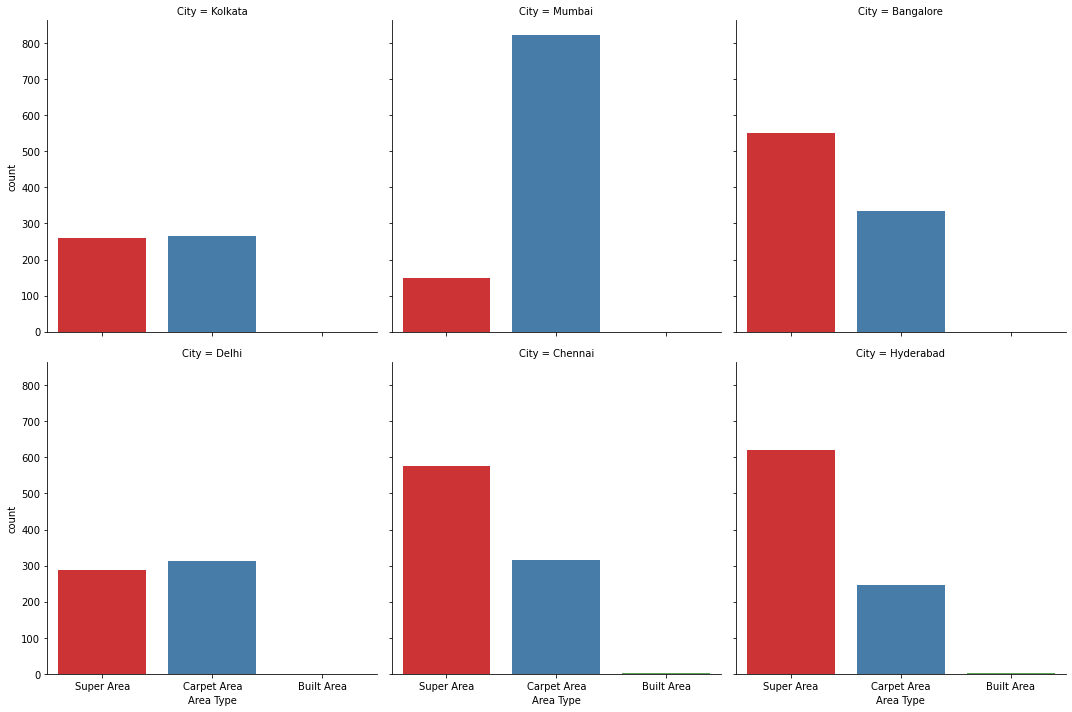

In [61]:
sns.catplot(kind='count', data=df, x='Area Type', col = 'City', col_wrap=3, palette='Set1')
plt.show()

In [64]:
# The area type is evenly distributed in Kolkata and Delhi. 
# For Mumbai, Carpet Area is the most common. 
# Super Area is more common in Bangalore, Hyderabad and Chennai.

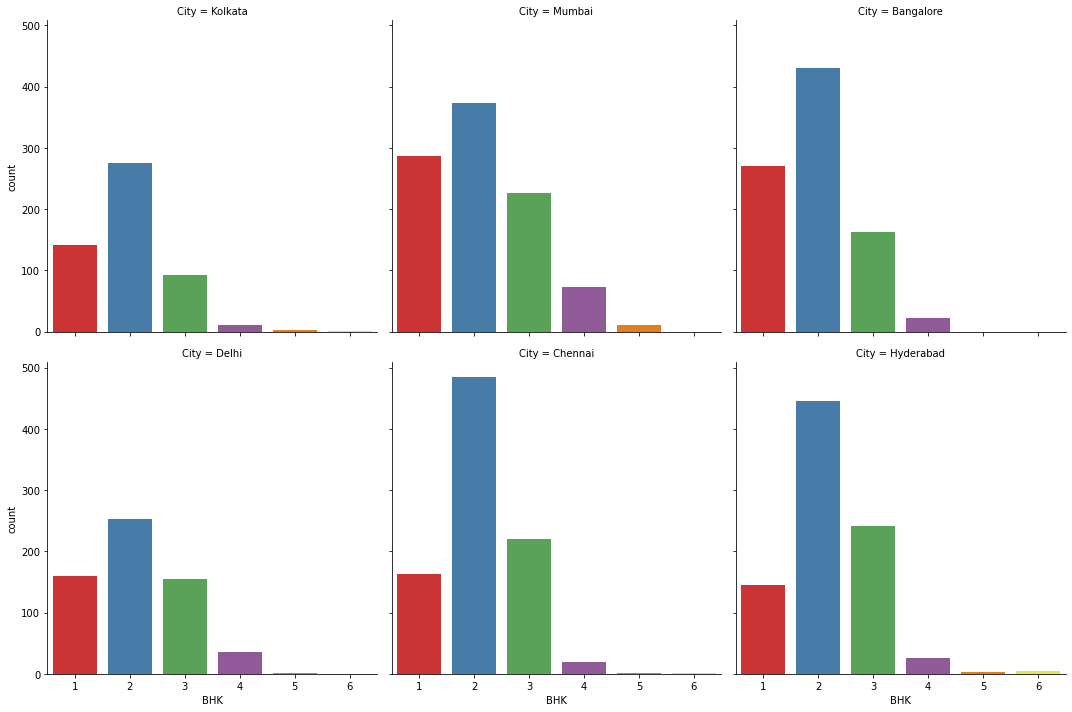

In [65]:
sns.catplot(kind='count', data=df, x='BHK', col = 'City', col_wrap=3, palette='Set1')
plt.show()

In [66]:
# The houses with 2 BHK is most favoured destination for every city.
# The houses with highier number of BHK is least favoured.

### Let's analyse the furnishing status column

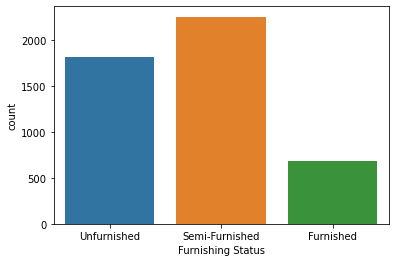

In [67]:
sns.countplot(x='Furnishing Status',data=df)
plt.show()

In [68]:
# Semi-Furnished houses are more preffered by the people.

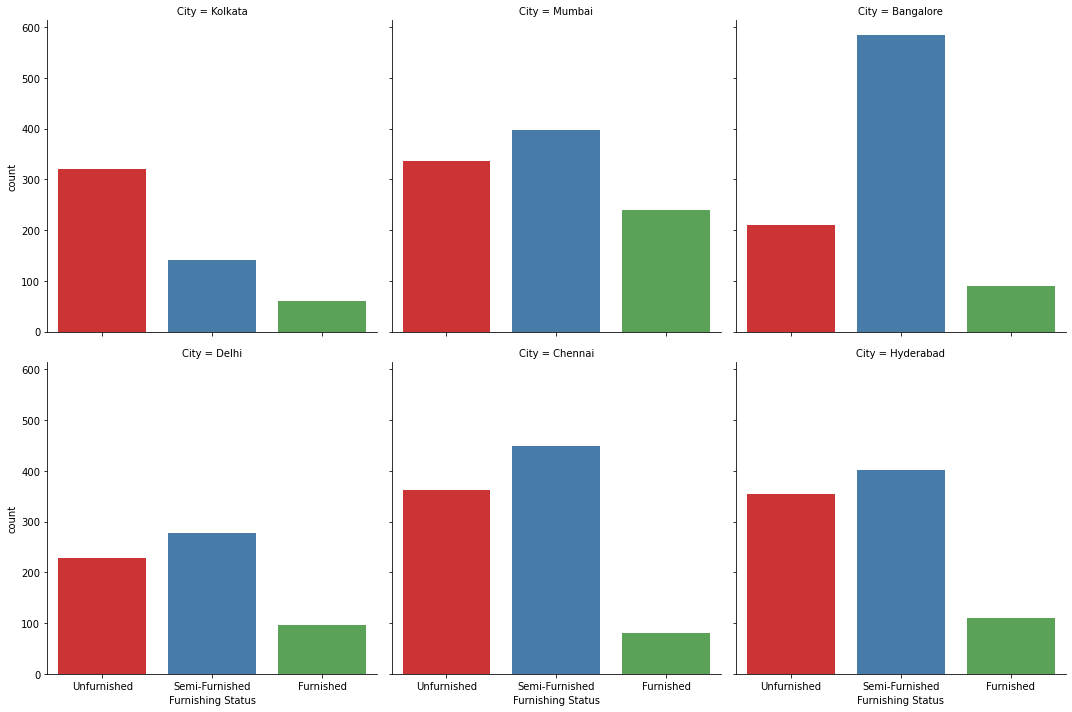

In [69]:
sns.catplot(kind='count', data=df, x='Furnishing Status', col = 'City', col_wrap=3, palette='Set1')
plt.show()

In [70]:
# This shows that in Delhi Unfurnished houses are more favoured over remaing.

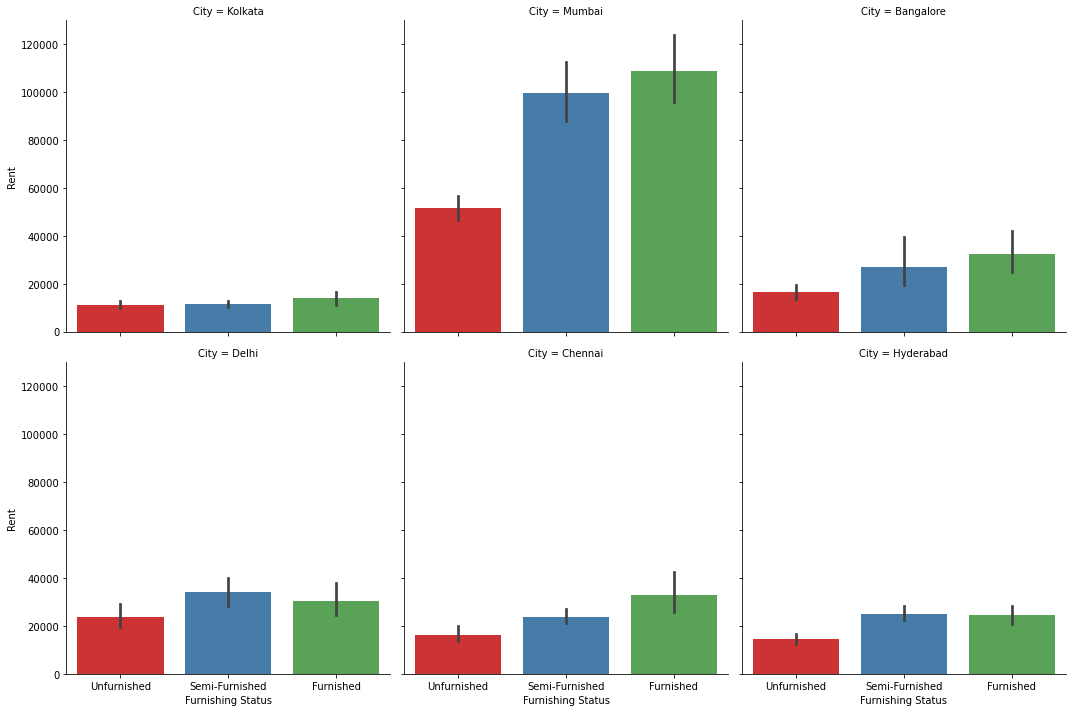

In [71]:
sns.catplot(kind='bar', data=df, x='Furnishing Status',y='Rent', col = 'City', col_wrap=3, palette='Set1')
plt.show()

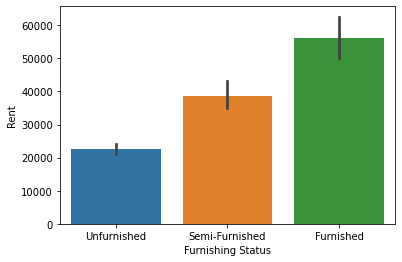

In [72]:
sns.barplot(x='Furnishing Status',y='Rent',data=df)
plt.show()

### Let's analyse the tenant preffered column

In [73]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


In [74]:
df['Tenant Preferred'].value_counts()

Bachelors/Family    3441
Bachelors            830
Family               471
Name: Tenant Preferred, dtype: int64

In [75]:
# Bachelors/Family is more common.

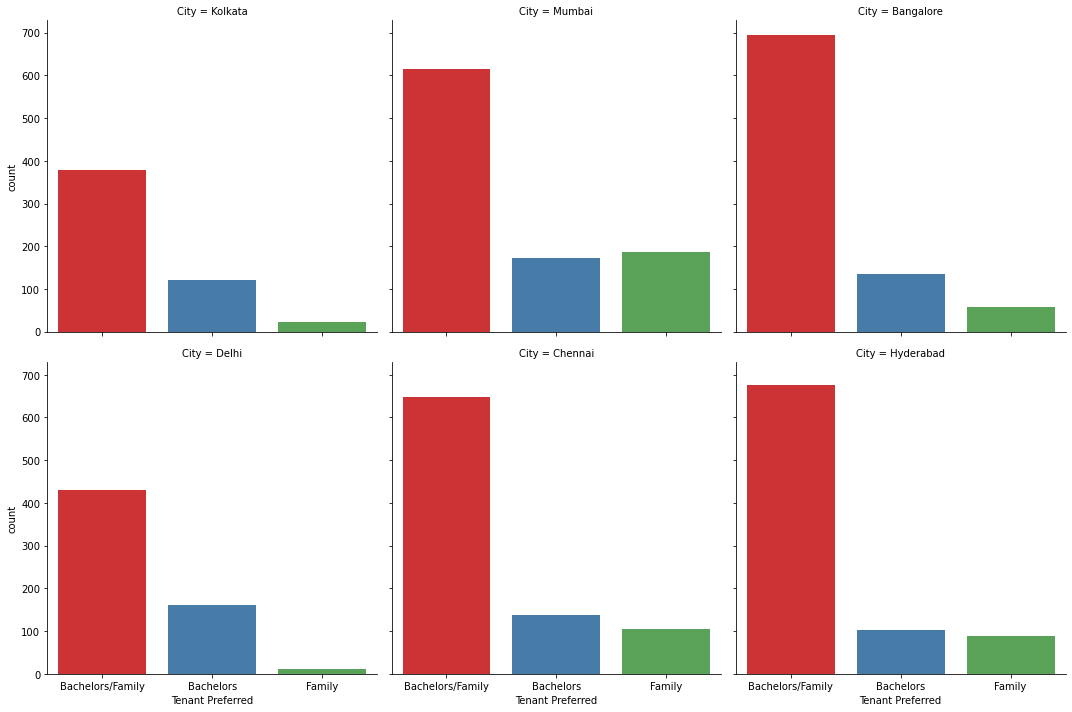

In [77]:
sns.catplot(kind='count', data=df, x='Tenant Preferred', col='City', col_wrap=3, palette='Set1')
plt.show()

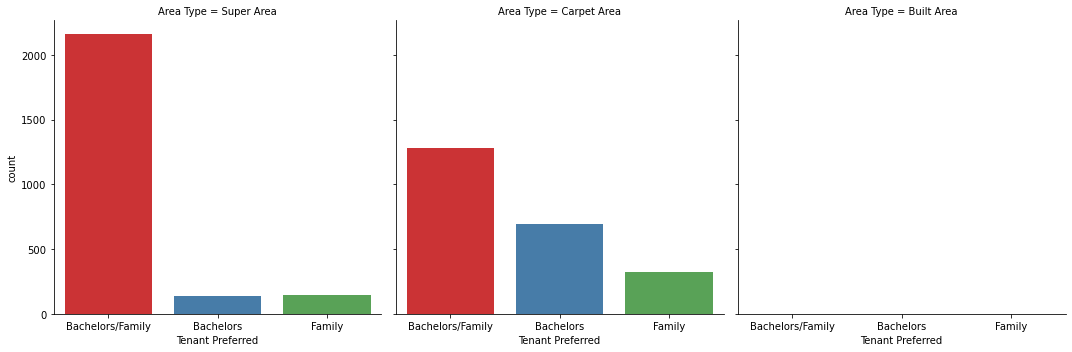

In [78]:
sns.catplot(kind='count', data=df, x='Tenant Preferred', col='Area Type', col_wrap=3, palette='Set1')
plt.show()

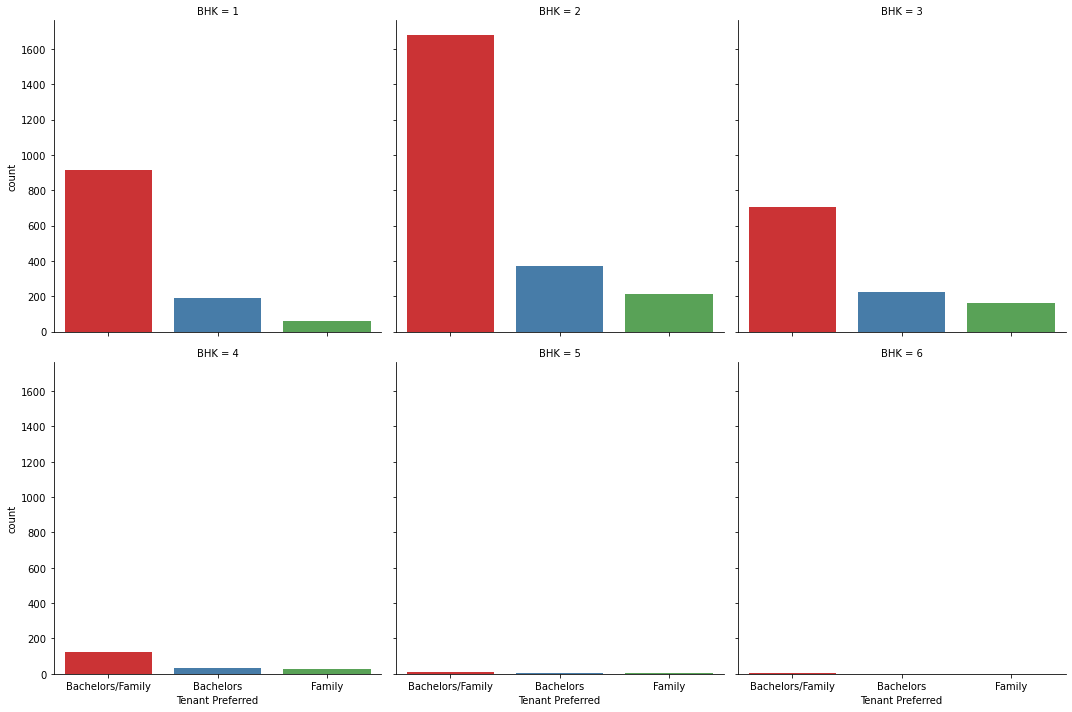

In [79]:
sns.catplot(kind='count', data=df, x='Tenant Preferred', col='BHK', col_wrap=3, palette='Set1')
plt.show()

### Let's analyse the bathroom column

In [80]:
df['Bathroom'].value_counts()

2     2290
1     1472
3      748
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

In [81]:
# The houses with 2 numbers of bathrooms are more common and 10 numbers of bathroom is rarely available.

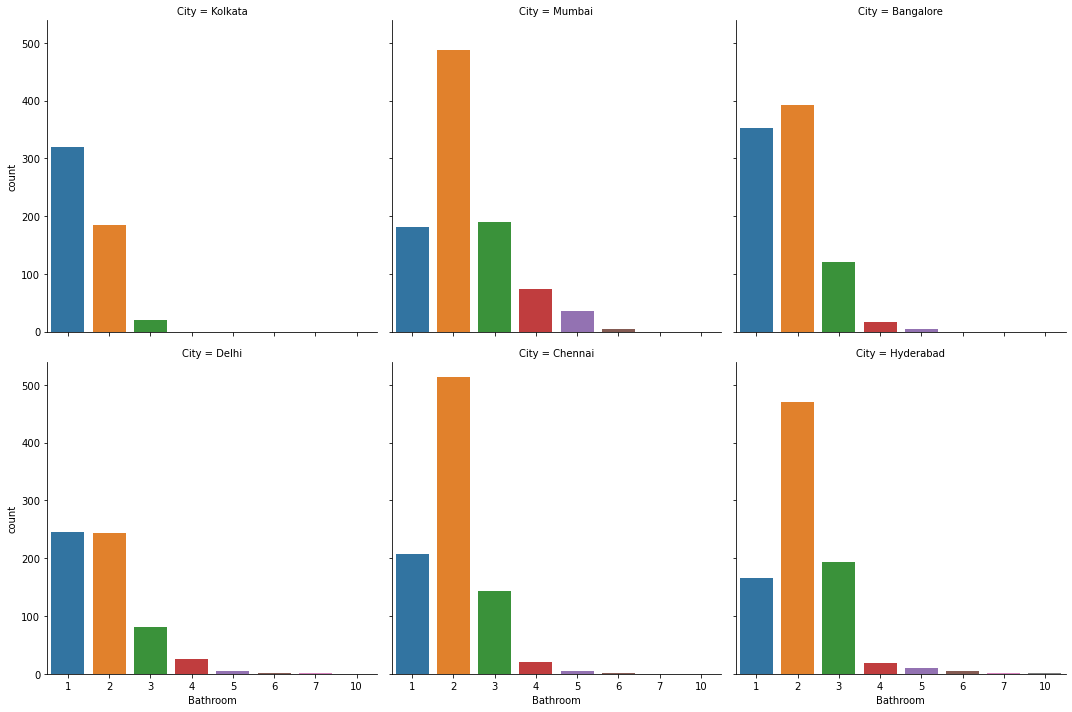

In [82]:
sns.catplot(data=df, x='Bathroom', col='City', col_wrap=3, kind='count')
plt.show()

In [83]:
# The houses with 2 bathrooms are more common except at Delhi and Kolkata.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

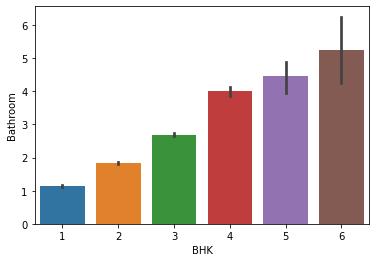

In [84]:
sns.barplot(x='BHK',y='Bathroom',data=df)
plt.plot

In [85]:
# As expected, the number of bathroom increases with the number of BHK.

### Let's analyse the point of contact column

In [86]:
df['Point of Contact'].value_counts()

Contact Owner      3212
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

In [87]:
# There is just one instance of Contact Builder. Contact Owner is the most common, followed by Contact Agent.

### Let's analyse posted on column

In [88]:
df['Month'] = pd.to_datetime(df['Posted On']).dt.month
df['Day'] = pd.to_datetime(df['Posted On']).dt.day

In [89]:
# Year only has the value 2022, so I'll not consider any feature for Year. I have extracted features for Month and Day.

In [90]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors,Month,Day
0,2022-05-18,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2,5,18
1,2022-05-13,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,5,13
2,2022-05-16,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,5,16
3,2022-07-04,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,7,4
4,2022-05-09,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,5,9


In [91]:
df.drop('Posted On', axis=1, inplace=True)

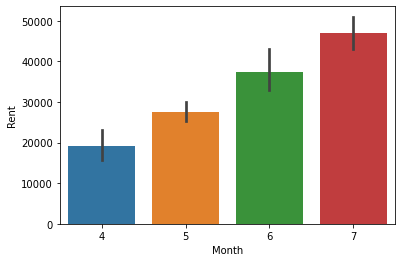

In [92]:
sns.barplot(x='Month',y='Rent',data=df)
plt.show()

In [93]:
# The month of July seems to be more expansive and month of April is least expansive.

In [94]:
df['Day'].value_counts()

6     456
4     264
29    264
23    235
12    219
27    218
10    212
20    192
14    192
30    179
9     171
25    163
7     158
8     155
18    149
2     147
16    147
5     138
22    127
28    113
19    110
31     90
3      87
24     84
1      83
17     81
26     70
21     66
13     61
15     56
11     55
Name: Day, dtype: int64

In [95]:
def quantize_day(day):
    if day < 10:
        return 'low'
    if day < 20:
        return 'medium'
    if day <= 31:
        return 'high'

In [96]:
df['Day'] = df['Day'].apply(lambda day: quantize_day(day))

In [97]:
df['Day'].value_counts()

high      1801
low       1659
medium    1282
Name: Day, dtype: int64

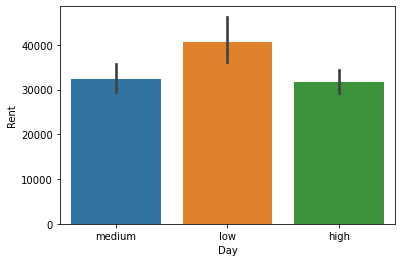

In [98]:
sns.barplot(x='Day',y='Rent',data=df)
plt.show()

In [99]:
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors,Month,Day
0,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2,5,medium
1,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,5,medium
2,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3,5,medium
3,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,7,low
4,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,5,low


## Data Preprocessing and creating test and train dataset

In [101]:
df_1 = df.copy()

In [102]:
df = pd.get_dummies(df, drop_first=True)

In [103]:
df.head()

,BHK,Rent,Size,Floor,Bathroom,Total Floors,Month,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,...,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Day_low,Day_medium
0,2,10000,1100,0,2,2,5,0,1,0,...,1,0,0,1,1,0,0,1,0,1
1,2,20000,800,1,1,3,5,0,1,0,...,1,0,1,0,1,0,0,1,0,1
2,2,17000,1000,1,1,3,5,0,1,0,...,1,0,1,0,1,0,0,1,0,1
3,2,10000,800,1,1,2,7,0,1,0,...,1,0,0,1,1,0,0,1,1,0
4,2,7500,850,1,1,2,5,1,0,0,...,1,0,0,1,0,0,0,1,1,0


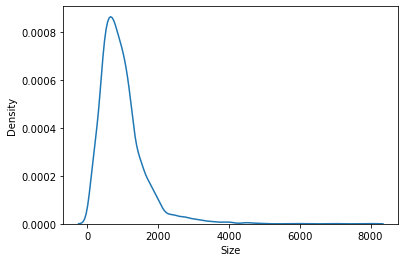

In [104]:
sns.kdeplot( data=df, x='Size')
plt.show()

In [105]:
df['Size_log'] = df['Size'].apply(lambda x: np.log(x+1))

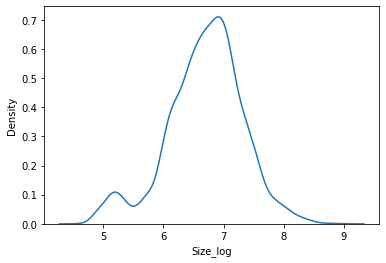

In [106]:
sns.kdeplot( data=df, x='Size_log')
plt.show()

In [107]:
df.drop('Size', axis=1, inplace=True)

In [108]:
df.head()

,BHK,Rent,Floor,Bathroom,Total Floors,Month,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Day_low,Day_medium,Size_log
0,2,10000,0,2,2,5,0,1,0,0,...,0,0,1,1,0,0,1,0,1,7.003974
1,2,20000,1,1,3,5,0,1,0,0,...,0,1,0,1,0,0,1,0,1,6.685861
2,2,17000,1,1,3,5,0,1,0,0,...,0,1,0,1,0,0,1,0,1,6.908755
3,2,10000,1,1,2,7,0,1,0,0,...,0,0,1,1,0,0,1,1,0,6.685861
4,2,7500,1,1,2,5,1,0,0,0,...,0,0,1,0,0,0,1,1,0,6.746412


In [135]:
from sklearn.model_selection import train_test_split
X = df.drop('Rent', axis=1)
y = df['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train['Size_log'] = sc.fit_transform(X_train['Size_log'].to_frame())

In [137]:
X_test['Size_log'] = sc.transform(X_test['Size_log'].to_frame())

## Modelling

#### Random Forest Regressor

In [138]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor()
Rf.fit(X_train,y_train)

RandomForestRegressor()

In [140]:
y_pred = Rf.predict(X_test)

In [141]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.6180451894346262

### Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [143]:
y_pred = lr.predict(X_test)

In [144]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.3167105225879935

### Decision Tree Regressor

In [146]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [147]:
y_pred = dtr.predict(X_test)

In [148]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.18266282821865354